In [122]:
import pandas as pd

datos = pd.read_csv('carros.csv')
datos.head()

,precio,vendido,edad_del_modelo,km_by_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [123]:
# situacion con los datos ordenados de la peor manera
datos_ord = datos.sort_values('vendido', ascending = True)
x_ord = datos_ord[['precio', 'edad_del_modelo', 'km_by_year']]
y_ord = datos_ord['vendido']
datos_ord.head()

,precio,vendido,edad_del_modelo,km_by_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [124]:
# DummyClassifier para obtener la prediccion mas basica

In [125]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score = False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [58.00, 58.00]


In [126]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score = False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con cross validation, 10 = [73.83, 77.73]


In [127]:
# generando datos aleatorios del modelo de carro
np.random.seed(SEED)
datos['modelo'] = datos.edad_del_modelo + np.random.randint(-2, 3 , size = 10000)
datos.modelo = datos.modelo + abs(datos.modelo.min())
datos.head()

,precio,vendido,edad_del_modelo,km_by_year,modelo
0,30941.02,1,18,35085.22134,17
1,40557.96,1,20,12622.05362,23
2,89627.50,0,12,11440.79806,13
3,95276.14,0,3,43167.32682,5
4,117384.68,1,4,12770.11290,4


In [128]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desviacion = results['test_score'].std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [129]:
# GroupKFold en un pipeline con StandardScaler y SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacion',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

KeyboardInterrupt: ignored

In [ ]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits= 10)
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)


In [ ]:
modelo

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, 
                           filled=True, 
                           rounded=True,
                           class_names=['no', 'si'],
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Modelo con profundidad de 3

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits= 10)
modelo = DecisionTreeClassifier(max_depth = 3)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, 
                           filled=True, 
                           rounded=True,
                           class_names=['no', 'si'],
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# modelo con profundidad de 10
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits= 10)
modelo = DecisionTreeClassifier(max_depth = 10)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

# Probando parametros

In [130]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits= 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print("Arbol max_depth = %d, trainig = %.2f, testing = %.2f" % (max_depth, train_score, test_score))
  tabla = [max_depth, train_score, test_score]
  return tabla

resultados = [iniciar_arbol_de_decision(i) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns = ['max_depth', 'train', 'test'])
resultados.head()
# diferentes profundidades arroja diferentes precisiones a veces mejores a veces no
# el modelo es overfit

Arbol max_depth = 1, trainig = 75.79, testing = 75.78
Arbol max_depth = 2, trainig = 75.79, testing = 75.78
Arbol max_depth = 3, trainig = 78.75, testing = 78.67
Arbol max_depth = 4, trainig = 78.79, testing = 78.63
Arbol max_depth = 5, trainig = 78.94, testing = 78.56
Arbol max_depth = 6, trainig = 79.17, testing = 78.12
Arbol max_depth = 7, trainig = 79.50, testing = 77.96
Arbol max_depth = 8, trainig = 79.89, testing = 77.86
Arbol max_depth = 9, trainig = 80.46, testing = 77.38
Arbol max_depth = 10, trainig = 81.16, testing = 77.19
Arbol max_depth = 11, trainig = 82.03, testing = 76.97
Arbol max_depth = 12, trainig = 82.89, testing = 76.49
Arbol max_depth = 13, trainig = 83.95, testing = 75.81
Arbol max_depth = 14, trainig = 85.03, testing = 75.66
Arbol max_depth = 15, trainig = 86.14, testing = 75.16
Arbol max_depth = 16, trainig = 87.19, testing = 75.11
Arbol max_depth = 17, trainig = 88.31, testing = 74.74
Arbol max_depth = 18, trainig = 89.26, testing = 74.33
Arbol max_depth = 1

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


# Overfit

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x = 'max_depth', y = 'train', data = resultados)
sns.lineplot(x = 'max_depth', y = 'test', data = resultados)
plt.legend(['Train', 'Test'])

In [ ]:
resultados.sort_values('test', ascending=False).head()

# Explorando hiper-parametros en dos dimensiones

In [137]:
for x in range(1, 64):
  for y in range(1, 64):
    print('max_depth: ' + str(x) + ' - min_depth_leaf: ' + str(y))

max_depth: 1 - min_depth_leaf: 1
max_depth: 1 - min_depth_leaf: 2
max_depth: 1 - min_depth_leaf: 3
max_depth: 1 - min_depth_leaf: 4
max_depth: 1 - min_depth_leaf: 5
max_depth: 1 - min_depth_leaf: 6
max_depth: 1 - min_depth_leaf: 7
max_depth: 1 - min_depth_leaf: 8
max_depth: 1 - min_depth_leaf: 9
max_depth: 1 - min_depth_leaf: 10
max_depth: 1 - min_depth_leaf: 11
max_depth: 1 - min_depth_leaf: 12
max_depth: 1 - min_depth_leaf: 13
max_depth: 1 - min_depth_leaf: 14
max_depth: 1 - min_depth_leaf: 15
max_depth: 1 - min_depth_leaf: 16
max_depth: 1 - min_depth_leaf: 17
max_depth: 1 - min_depth_leaf: 18
max_depth: 1 - min_depth_leaf: 19
max_depth: 1 - min_depth_leaf: 20
max_depth: 1 - min_depth_leaf: 21
max_depth: 1 - min_depth_leaf: 22
max_depth: 1 - min_depth_leaf: 23
max_depth: 1 - min_depth_leaf: 24
max_depth: 1 - min_depth_leaf: 25
max_depth: 1 - min_depth_leaf: 26
max_depth: 1 - min_depth_leaf: 27
max_depth: 1 - min_depth_leaf: 28
max_depth: 1 - min_depth_leaf: 29
max_depth: 1 - min_dept

In [ ]:
# Esta no es la mejor forma

In [138]:

def iniciar_arbol_de_decision(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits= 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print("Arbol max_depth = %d, min_samples_leaf = %d, trainig = %.2f, testing = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, train_score, test_score]
  return tabla

def buscar():
  resultados =[]
  for max_depth in range(1, 32):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'train', 'test'])
  return resultados

resultados = buscar()
resultados.head()

# funcion buscar entra en todos los rangos de depth hasta el 32
# en el rango de samples solo analiza los que se le seleccionaron


Arbol max_depth = 1, min_samples_leaf = 32, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, trainig = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 32, trainig = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 64, trainig = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, trainig = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, trainig = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 32, trainig = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 64, trainig = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 128, trainig = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, trainig = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 32, trainig = 78.75, testing =

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [139]:
resultados.sort_values('test', ascending=False).head()
# al final el el dataframe muestra los mejores valores y en que profundidad

,max_depth,min_samples_leaf,train,test
11,3,256,78.750993,78.672633
8,3,32,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633


# Matriz de correlacion

In [140]:
corr = resultados.corr()
corr
# relacion entre los dos parametros

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.819789e-16,0.546146,-0.024381
min_samples_leaf,-2.819789e-16,1.000000e+00,-0.401773,0.341805
train,5.461464e-01,-4.017734e-01,1.000000,0.133720
test,-2.438091e-02,3.418055e-01,0.133720,1.000000


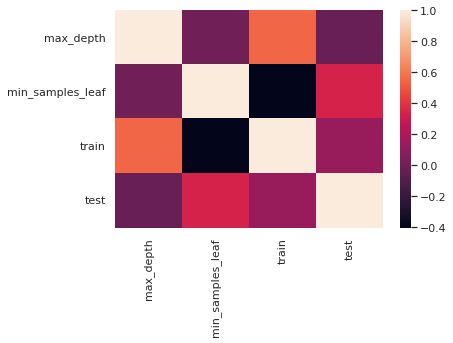

In [141]:
sns.heatmap(corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2edaaef550>,
      dtype=object)

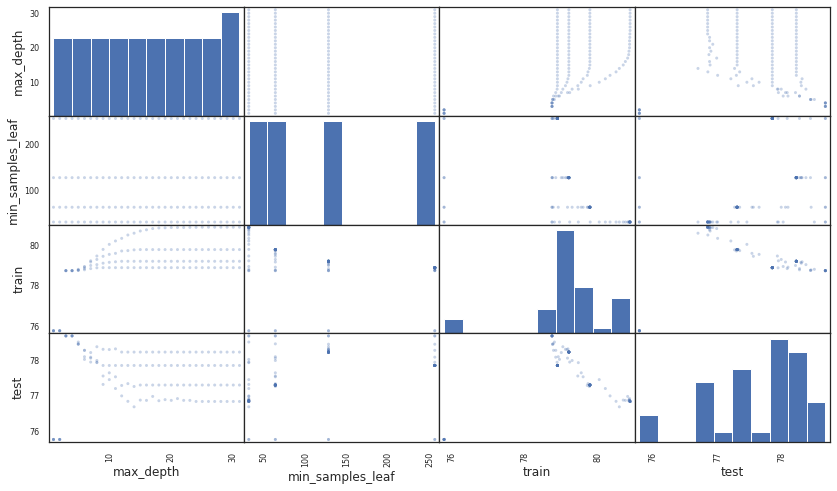

In [142]:
from pandas.plotting import scatter_matrix
scatter_matrix(resultados, figsize = (14, 8), alpha=0.3)

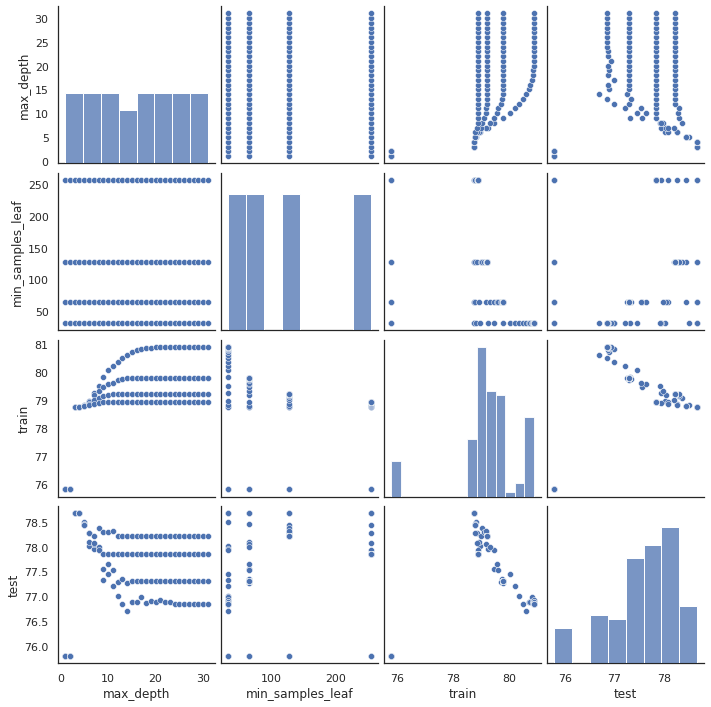

In [143]:
sns.pairplot(resultados)

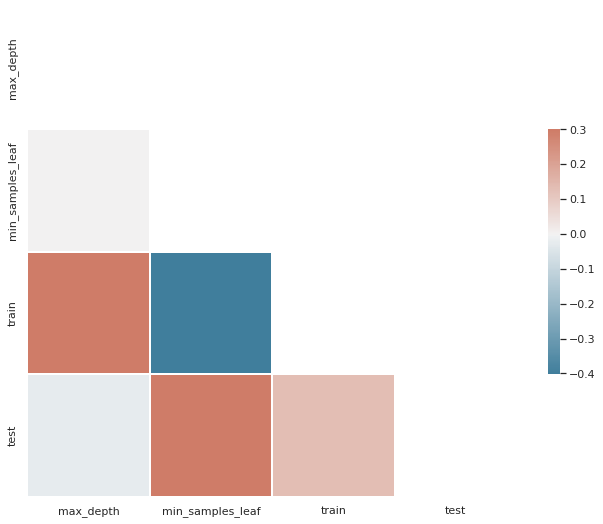

In [144]:
# Seaborn correlacion

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

corr = resultados.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [145]:
# el max_depth es mejor con parametros bajos
# el sample es mejor en parametros altos
# de acuerdo a la matriz el max_depth lo seleccionamos en 10 y el sample lo seleccionamos entre 120 y 250

In [146]:
def buscar():
  resultados =[]
  for max_depth in range(1, 10):
    for min_samples_leaf in [128, 190, 220, 256]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'train', 'test'])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 128, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 190, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 220, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, trainig = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, trainig = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 190, trainig = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 220, trainig = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, trainig = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 128, trainig = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 190, trainig = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 220, trainig = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, trainig = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 128, trainig = 78.75, te

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,190,75.791169,75.784219
2,1,220,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,128,75.791169,75.784219


In [147]:
resultados.sort_values('test', ascending=False).head()
# El resultado mostrara en que profundidad y en que muestra se obtiene el mejor resultado

,max_depth,min_samples_leaf,train,test
13,4,190,78.750993,78.672633
11,3,256,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,220,78.750993,78.672633
12,4,128,78.750993,78.672633


# Explorando 3 dimensiones de hiper parametros

In [148]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits= 10)
  modelo = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()

  print("Arbol max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, trainig = %.2f, testing = %.2f" % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabla

def buscar():
  resultados =[]
  for max_depth in range(1, 32):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'min_samples_split', 'train', 'test', 'fit_time', 'score_time'])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 32, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 64, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 128, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 256, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 32, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 64, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 128, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 256, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split = 32, trainig = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split = 64, trainig = 75.79, 

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.006828,0.002800
1,1,32,64,75.791169,75.784219,0.006612,0.002055
2,1,32,128,75.791169,75.784219,0.006714,0.002196
3,1,32,256,75.791169,75.784219,0.006518,0.002094
4,1,64,32,75.791169,75.784219,0.006812,0.002026


In [149]:
corr = resultados.corr()

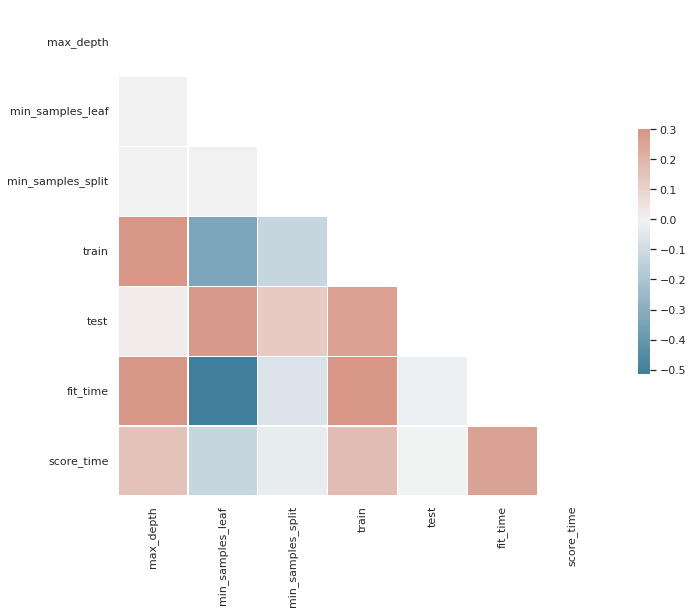

In [150]:
sns.set_theme(style="white")

corr = resultados.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [151]:
resultados.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
45,3,256,64,78.750993,78.672633,0.012205,0.002755
41,3,128,64,78.750993,78.672633,0.011754,0.002533
48,4,32,32,78.750993,78.672633,0.013893,0.002263
47,3,256,256,78.750993,78.672633,0.011176,0.002272
46,3,256,128,78.750993,78.672633,0.012095,0.002520


# Explorando espacio de hiper parametros con GridSearchCV

In [153]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth': [3,5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = GroupKFold(n_splits = 10))

buscar.fit(x_ord, y_ord, groups = datos.modelo)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031967,0.013960,0.006884,0.006906,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.025523,0.007928,0.004989,0.002183,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.017545,0.002292,0.004198,0.000435,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.017675,0.003127,0.004056,0.000420,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.018344,0.003979,0.004606,0.001685,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [159]:
print(buscar.best_params_)
print(buscar.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [158]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [161]:
from sklearn.metrics import accuracy_score

prediccion = mejor.predict(x_ord)
accuracy = accuracy_score(prediccion, y_ord) * 100
print('Accuracy para los datos fue %.2f' % accuracy)

Accuracy para los datos fue 78.75


# Nested cross validation

In [163]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth': [3,5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = KFold(n_splits = 5, shuffle = True))

buscar.fit(x_ord, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015269,0.001251,0.004177,0.000680,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.016439,0.003985,0.003877,0.000230,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.016655,0.002506,0.004258,0.000298,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.019127,0.005165,0.005125,0.002246,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.016647,0.004373,0.004327,0.001291,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [165]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits = 5, shuffle= True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [166]:
def imprime_score(scores):
  media = scores.mean() * 100
  desviacion = scores.std() * 100
  print('accuracy media %.2f' % media)
  print('Intervalo [%.2f, %.2f]' % (media - 2 * desviacion, media + 2 * desviacion))

In [167]:
imprime_score(scores)

accuracy media 78.67
Intervalo [76.80, 80.54]


In [168]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

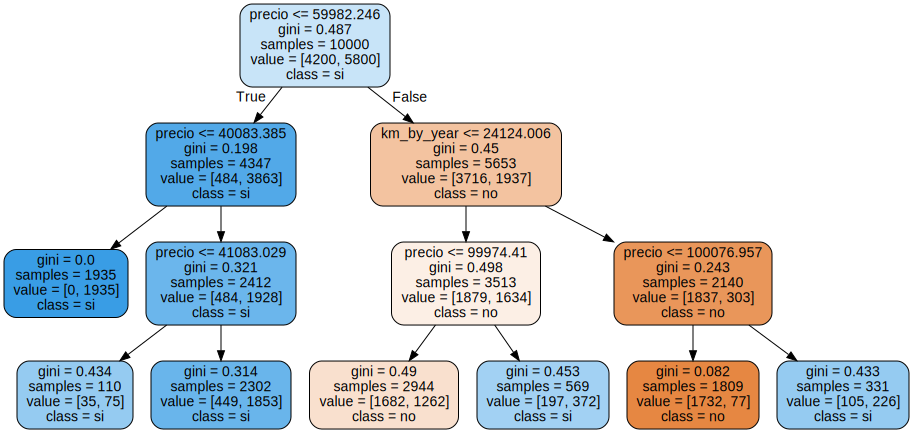

In [170]:
features = x_ord.columns
dot_data = export_graphviz(mejor, out_file=None,
                           filled = True,
                           rounded= True,
                           class_names=['no', 'si'],
                           feature_names = features)

graph = graphviz.Source(dot_data)
graph